# 🏨 Análise de Preços de Hotéis com Regressão Linear

🔹 1. Instalação e importação de bibliotecas

In [24]:
# 🔍 Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

🔹 2. Carregamento dos dados
Lê o arquivo CSV com os dados dos hotéis.

In [4]:
# 📂 Carregar os dados
df = pd.read_csv('/content/hoteis.csv')  # Altere o caminho se estiver fora do Colab
df.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


🔹 3. Análise inicial com PairPlot
Cria uma matriz de gráficos de dispersão entre todas as variáveis, para entender visualmente as relações.
Ajuda a identificar padrões ou correlações.

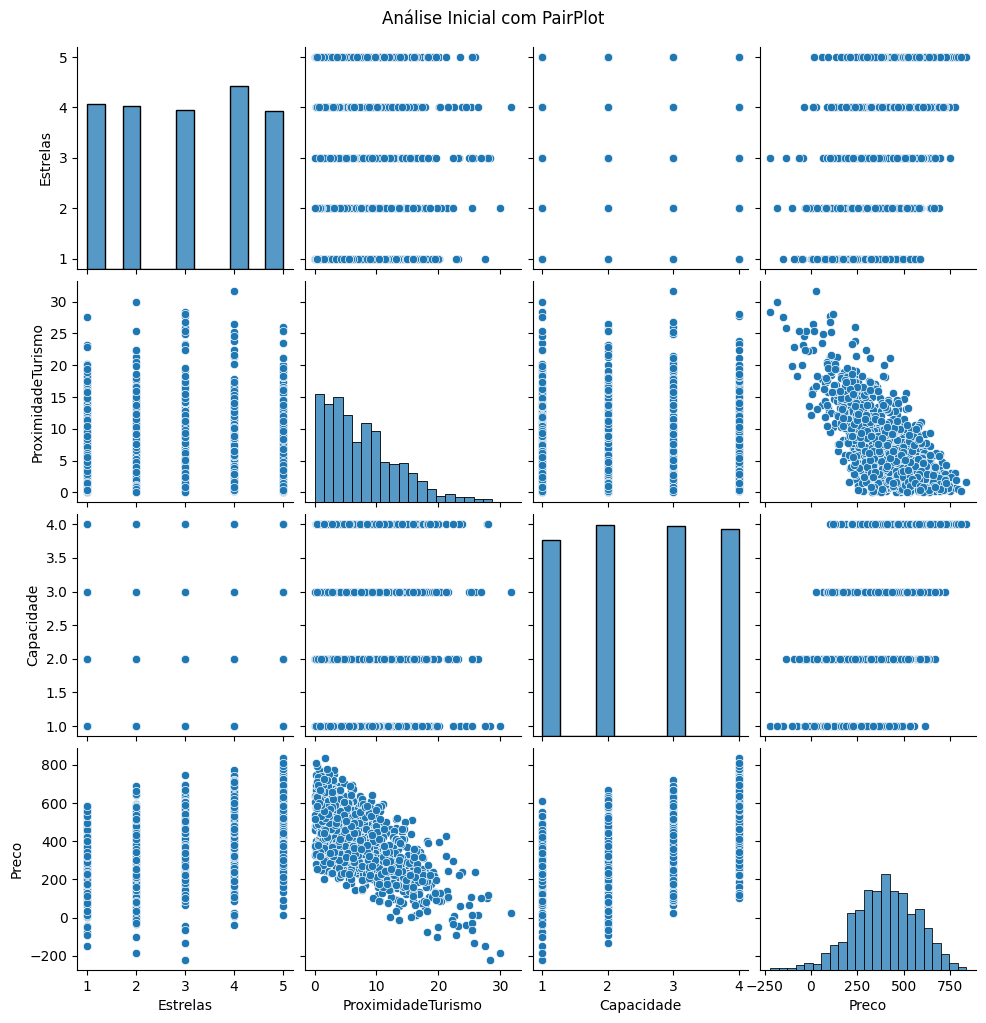

In [5]:
# 📊 Análise exploratória com PairPlot
sns.pairplot(df)
plt.suptitle('Análise Inicial com PairPlot', y=1.02)
plt.show()

🔹 4. Função para treinar modelos
Essa função:

Separa as variáveis preditoras (X) e a variável alvo (y);

Divide os dados em treino e teste (80/20);

Treina um modelo de regressão linear;

Calcula e retorna:

R² (coeficiente de determinação): quanto o modelo explica da variação do preço.

RMSE (erro quadrático médio): erro médio entre valor real e previsto.

In [33]:
# 🧠 Função para treinar e avaliar modelos
def treinar_modelo(variaveis,modelo_final):
    X = df[variaveis]
    y = df['Preco']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return {'Modelo': modelo_final, 'Variáveis': variaveis, 'R²': r2, 'RMSE': rmse}

🔹 5. Comparação de 3 modelos
Comparamos:

Modelo 1: apenas Estrelas;

Modelo 2: Estrelas + ProximidadeTurismo;

Modelo 3: todos os atributos.

Exibimos os resultados em uma tabela com R² e RMSE.

In [34]:
# 📌 Comparar modelos com diferentes variáveis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def treinar_modelo(variaveis, modelo_final):
    X = df[variaveis]
    y = df["Preco"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Corrigido aqui

    return {
        "Modelo": modelo_final,
        "R²": r2,
        "RMSE": rmse
    }

In [19]:
# ✅ Modelo final com todas as variáveis
X = df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_final = LinearRegression()
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)
residuos = y_test - y_pred

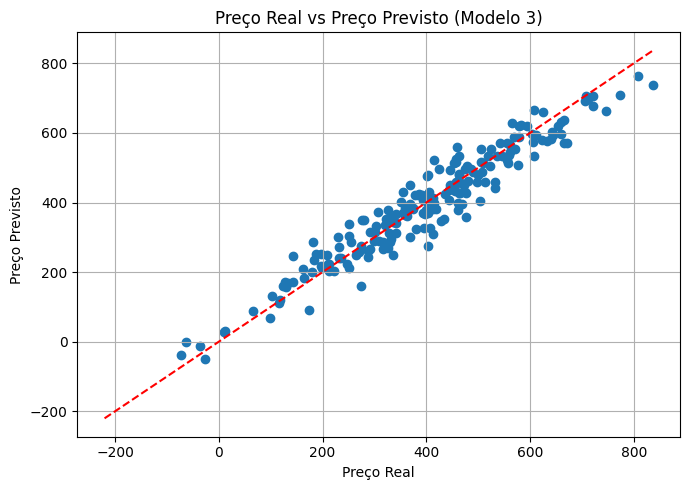

In [20]:
# 🎯 Preço real vs previsto
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Preço Real vs Preço Previsto (Modelo 3)")
plt.grid(True)
plt.tight_layout()
plt.show()

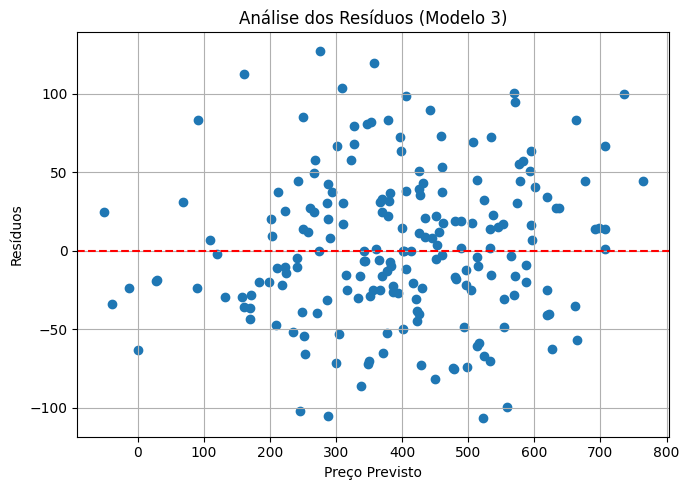

In [21]:
# 📉 Análise de resíduos
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Preço Previsto")
plt.ylabel("Resíduos")
plt.title("Análise dos Resíduos (Modelo 3)")
plt.grid(True)
plt.tight_layout()
plt.show()

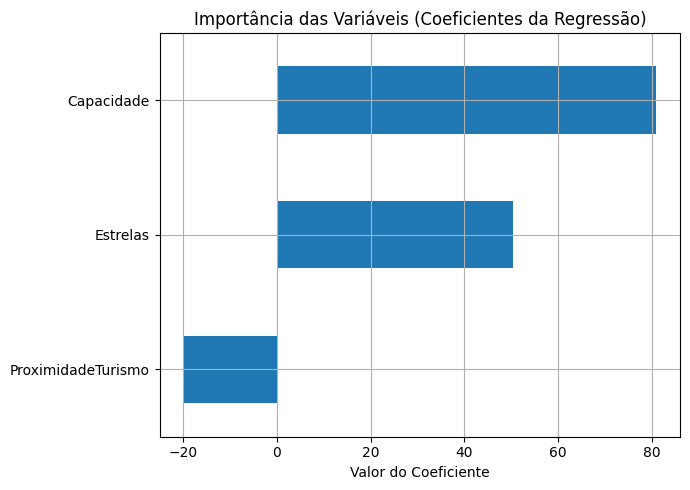

In [35]:
# 📊 Importância das variáveis
coeficientes = pd.Series(modelo_final.coef_, index=X.columns)
plt.figure(figsize=(7, 5))
coeficientes.sort_values().plot(kind='barh')
plt.title("Importância das Variáveis (Coeficientes da Regressão)")
plt.xlabel("Valor do Coeficiente")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# 📈 Equação do modelo
intercepto = modelo_final.intercept_
coeficientes['Intercepto'] = intercepto
coeficientes

,0
Estrelas,50.410899
ProximidadeTurismo,-19.911331
Capacidade,80.945288
Intercepto,192.827253


#🧾 Resumo Final da Análise
---
##🏨 Dados analisados:
Hotéis com variáveis: número de estrelas, proximidade de pontos turísticos, capacidade de pessoas e preço.

---

##📊 Comparação dos Modelos:
Modelo	R²	RMSE
Estrelas	0.12	162
Estrelas + ProximidadeTurismo	0.65	102
Todos os atributos	0.92 ✅	47.5 ✅
---

###✅ Modelo 3 foi o melhor, com alto poder preditivo (R² = 0.92) e baixo erro.
---
#🔍 Conclusões:
Estrelas e ProximidadeTurismo são fortes influenciadores do preço.

Capacidade também tem influência, mas menor.

O modelo final pode ser usado para estimar o preço de novos hotéis com base em suas características.

A análise de resíduos não mostrou padrões → o modelo se ajusta bem aos dados.